In [1]:
#Importing pandas and numpy and matplotlib for data reading/exploration/analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the creditcard dataset (csv file)
df = pd.read_csv('./cc_data.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.shape

(284807, 31)

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
df_copy = df.copy()
df_copy.drop_duplicates(subset=None, inplace=True)

In [12]:
df_copy.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
print('No Frauds', round(df['Class'].value_counts()[0]/(len(df))*100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/(len(df))*100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


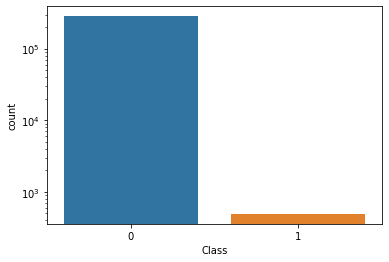

In [17]:
ax = sns.countplot(x='Class', data=df)
ax.set_yscale('log')

1. Evidently, the dataset is skewed. 99.83% of the data is of the non-fraud cases whilst the rest is of fraud. Which makes this data skewed and inclined towards non-accurate predictions.


In [23]:
display(df.loc(['Amount', 'Class']))

TypeError: unhashable type: 'list'

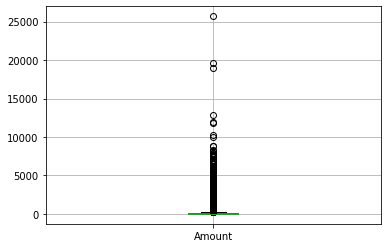

In [28]:
boxplot = df.boxplot(column=['Amount'])

In [29]:
#Since the dataset is heavily distributed towards the non-fradulent cases, let's create a sub-sample with equally distributed cases

df = df.sample(frac=1)

fraud_df = df.loc[df['Class']==1]
non_fraud_df = df.loc[df['Class']==0][:492] 

normal_dist_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_dist_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
167027,118441.0,-0.662244,0.857878,-2.010444,-0.397653,1.687383,-1.671696,1.060973,-0.030927,-0.701949,...,0.138898,0.649694,0.625720,0.643991,-0.545045,0.399123,0.173892,0.092633,3.11,0
95534,65358.0,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,1.169425,...,-0.049502,0.207265,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,31.91,1
218263,141240.0,1.826697,-0.885394,0.907525,1.846887,-1.580475,0.722766,-1.587043,0.511221,2.699598,...,0.099573,0.790114,0.139407,-0.107357,-0.198264,-0.460691,0.125579,-0.022189,11.50,0
12369,21662.0,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,...,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1.00,1
68633,53076.0,1.296231,0.417447,0.193963,0.901644,0.130531,-0.371634,0.158126,-0.202669,-0.079512,...,-0.112114,-0.220002,-0.121022,-0.440454,0.671540,-0.413518,0.032838,0.020600,1.18,1


In [30]:
display(new_df.shape)

(984, 31)

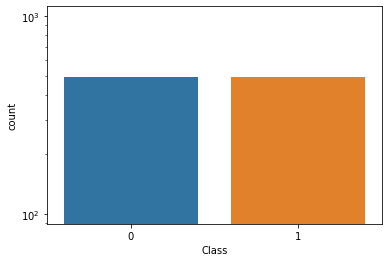

In [31]:
ax = sns.countplot(x='Class', data=new_df)
ax.set_yscale('log')

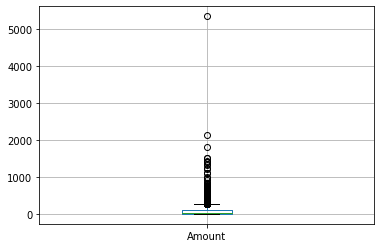

In [32]:
boxplot = new_df.boxplot(column=['Amount'])

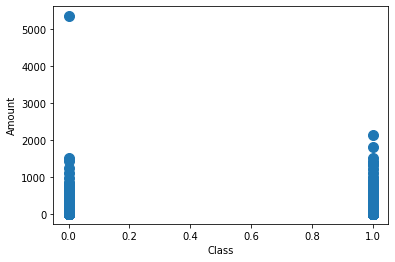

In [34]:
new_df.plot.scatter(x = 'Class', y = 'Amount', s = 100);


The scatter plot may look a bit unusual, but it does reflect a relation between the amount and fradulency.
Most of the fradulent cases are in the range of amount 0-2000

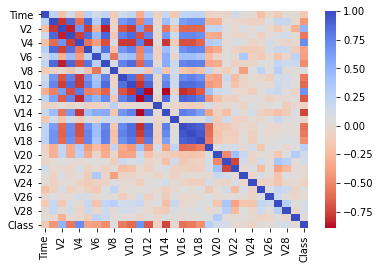

In [39]:



sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

X = new_df.drop('Class', axis=1)

y = new_df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logisreg = LogisticRegression()

logisreg.fit(X_train, y_train)

y_pred = logisreg.predict(X_test)


acc_score = round(accuracy_score(y_test, y_pred)*100, 2)

print("Accuracy score: ", acc_score)

Accuracy score:  93.4


In [47]:
from sklearn.metrics import confusion_matrix

cnf_mat = confusion_matrix(y_pred, y_test)
cnf_mat

array([[ 82,   8],
       [  5, 102]], dtype=int64)

<AxesSubplot:>

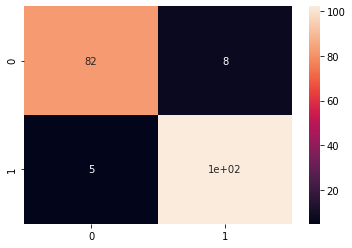

In [48]:

sns.heatmap(cnf_mat, annot=True)

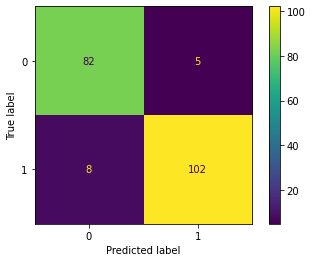

In [49]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logisreg, X_test, y_test);